# Libraries

In [99]:
import os
import datetime
import regex as re
import glob
import requests
import time
from bs4 import BeautifulSoup
from collections import defaultdict, Counter
import random
import shutil
from pathlib import Path
from datetime import datetime
import pandas as pd
import html
import numpy as np
import nltk
nltk.download('stopwords')
from string import punctuation
stopwords = set(nltk.corpus.stopwords.words('english'))

## For Modeling 
from tqdm.auto import tqdm

import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim_models as gensimvis
import gensim

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from spacy.lang.en.stop_words import STOP_WORDS as stopwords

from collections import Counter, defaultdict

nlp = spacy.load('en_core_web_sm')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/summerpurschke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## For Summer's Computer - have to add this to avoid an error with stopwords import 
import ssl 
# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/summerpurschke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scraping Data

## Get Links

In [3]:
years = {'year07':"https://arlweb.msha.gov/fatals/indices/FABM2007.asp",
         'year06':"https://arlweb.msha.gov/fatals/indices/FABM2006.asp",
         'year05':"https://arlweb.msha.gov/fatals/indices/FABM2005.asp",
         'year04':"https://arlweb.msha.gov/fatals/indices/FABM2004.HTM",
         'year03':"https://arlweb.msha.gov/fatals/indices/FABM2003.HTM",
         'year02':"https://arlweb.msha.gov/fatals/indices/FABM2002.HTM",
         'year01':"https://arlweb.msha.gov/fatals/indices/FABM2001.HTM",
         'year00':"https://arlweb.msha.gov/fatals/indices/FABM2000.HTM",
         'year99':"https://arlweb.msha.gov/fatals/indices/FABM99.HTM",
         'year98':"https://arlweb.msha.gov/fatals/indices/FABM98.HTM",
         'year97':"https://arlweb.msha.gov/fatals/indices/FABM97.HTM",
         'year96':"https://arlweb.msha.gov/fatals/indices/FABM96.HTM",
         'year95':"https://arlweb.msha.gov/fatals/indices/FABM95.HTM",
        } 

In [4]:
report_pages = defaultdict(list)
urls = []
start_time = datetime.now()


for year, year_page in years.items() :
    r = requests.get(year_page)
    time.sleep(5 + 10*random.random())
    soup = BeautifulSoup(r.text, 'html.parser')
    links = soup.find_all('a', href=True)
    for link in links:
        if '/FATALS/' and '/FTL' in link['href']:
            urls.append(link.get('href'))
            report_pages[year].append(link.get('href'))
            
end_time = datetime.now()
computation_time = end_time - start_time 
print(f"Started At: {start_time} \nEnded At: {end_time}")     
print(f'Scraping took {computation_time} Minutes')       

Started At: 2023-06-22 15:21:41.907411 
Ended At: 2023-06-22 15:23:58.862726
Scraping took 0:02:16.955315 Minutes


In [5]:
for year, links in report_pages.items() : 
    print(f"For {year} we have {len(links)}.")
    print(f"The full pull will take for this year will take {round(len(links)*10/3600,2)} hours.")

For year07 we have 32.
The full pull will take for this year will take 0.09 hours.
For year06 we have 26.
The full pull will take for this year will take 0.07 hours.
For year05 we have 35.
The full pull will take for this year will take 0.1 hours.
For year04 we have 26.
The full pull will take for this year will take 0.07 hours.
For year03 we have 26.
The full pull will take for this year will take 0.07 hours.
For year02 we have 40.
The full pull will take for this year will take 0.11 hours.
For year01 we have 28.
The full pull will take for this year will take 0.08 hours.
For year00 we have 41.
The full pull will take for this year will take 0.11 hours.
For year99 we have 53.
The full pull will take for this year will take 0.15 hours.
For year98 we have 51.
The full pull will take for this year will take 0.14 hours.
For year97 we have 61.
The full pull will take for this year will take 0.17 hours.
For year96 we have 46.
The full pull will take for this year will take 0.13 hours.
For y

In [6]:
urls = [i for i in urls if not ('19' in i)] ## limiting to links 2000-2007

## Scrape Text to Files

In [7]:
#os.chdir('C:\\Users\\halle.davis\\Downloads\\reports') ## Halle's work folder path
#os.chdir('/Users/halledavis/Desktop/reports') ## Halle's personal folder path
#os.chdir('') ## Claire's folder path
os.chdir('/Users/summerpurschke/Desktop/ADS/ADS509/Final Project') ## Summer's folder path

In [12]:
# ## Run on All Links
# ## This will take an hour to run!!! (Lots of documents)

# url_stub = "https://arlweb.msha.gov/" 
# start_time = datetime.now()

# total_pages = 0 ## used if we want to limit the report number for performance purposes

# path = os.getcwd()

# for x in urls :
#     #if total_pages == 22:   ## used if we want to limit the report number for performance purposes
#     #    break 
#     name0 = x.replace('/', '')
#     name = name0.replace('.HTM', '')
#     name = name.replace('.asp', '')
#     filename = name+".txt"
#     if os.path.exists(filename):
#         file = open(filename, "r+")
#     else:
#         file = open(filename, "w+")
#     try:
#         soup = BeautifulSoup(requests.get(url_stub+x).content, "html.parser")    
#         time.sleep(5 + 10*random.random())
#         report = soup.get_text()
#         #title = soup.title.string
#         file.writelines(report)
#         time.sleep(5 + 10*random.random())
#         total_pages += 1
#     except:
#         pass
    
# end_time = datetime.now()
# print("Started At:", start_time, "\nEnded At:", end_time)

## Download Data to Dataframe

In [8]:
file_list = glob.glob(os.path.join(os.getcwd(), "*.txt"))
start_time = datetime.now()

reports = []

for file_path in file_list:
    with open(file_path) as f_input:
        text = (f_input.read())
        file_name = file_path.split("reports")[-1]
        reports.append(
            {
                'filename': file_name,
                'alltext': text
            }
        )
        
data = pd.DataFrame(reports)

end_time = datetime.now()
print("Started At:", start_time, "\nEnded At:", end_time)

Started At: 2023-06-22 15:25:39.734425 
Ended At: 2023-06-22 15:25:39.899481


# Preprocessing

### Get Title

In [9]:
data['title'] = data.alltext.astype(str).str.extract(r': (.*)')

In [10]:
data.head(20)

,filename,alltext,title
0,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
1,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
2,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
3,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
4,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
5,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
6,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
7,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
8,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN
9,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,\n\n\n\n\n\n\n\n\n\n\nMSHA - Metal/Nonmetal M...,"Fatality #25 - December 15, 2006"


### Get Cause

#### Causes include

ELECTRICAL - Accidents in which electric current is most directly responsible for the resulting accident.

ENTRAPMENT - In accidents involving no injuries or nonfatal injuries which are not serious, entrapment of mine workers takes precedence over roof falls, explosives accidents, inundations, etc. If a roof fall results in an entrapment accident, the accident classification is ï¿½Entrapment.

EXPLODING VESSELS UNDER PRESSURE - These are accidents caused by explosion of air hoses, air tanks, hydraulic lines, hydraulic hoses, and other accidents precipitated by exploding vessels.

EXPLOSIVES AND BREAKING AGENTS - Accidents involving the detonation of manufactured explosives, Airdox, or Cardox, that can cause flying debris, concussive forces, or fumes.

FALLING, ROLLING, OR SLIDING ROCK OR MATERIAL OF ANY KIND -Injuries caused directly by falling material require great care in classification. Remember that it is the accident we want to classify. If material was set in motion by machinery, haulage equipment, or hand tools, or while material is being handled or disturbed, etc., charge the force that set the material in motion. For example, where a rock was pushed over a highwall by a dozer and the rock hit another rock which struck and injured a worker - charge the accident to the dozer. Charge the accident to that which most directly caused the resulting accident. Without the dozer, there would have been no resulting accident. This includes accidents caused by improper blocking of equipment under repair or inspection.

FALL OF FACE, RIB, SIDE OR HIGHWALL - Accidents in this classification include falls of material (from in-place) while barring down or placing props; also pressure bumps and bursts. Since pressure bumps and bursts which cause accidents are infrequent, they are not given a separate category. Not included are accidents in which the motion of machinery or haulage equipment caused the fall either directly or by knocking out support; such accidents are classified as machinery or haulage, whichever is appropriate.

FALL OF ROOF OR BACK - Underground accidents which include falls while barring down or placing props; also pressure bumps and bursts. Not included are accidents in which the motion of machinery or haulage equipment caused the fall either directly or by knocking out support; such falls are classified as machinery or haulage, whichever is appropriate.

FIRE - In underground mines, an unplanned fire not extinguished within 10 minutes of discovery; in surface mines and surface areas of underground mines, an unplanned fire not extinguished within 30 minutes of discovery;

HANDLING MATERIAL - (Lifting, pulling, pushing, shoveling material.) The material may be in bags or boxes, or loose sand, coal, rock, timber, etc. The accident must have been most directly caused by handling material.

HAND TOOLS - Accidents related to non-powered tools when being used as hand tools. Do not include electric tools or air-powered tools.

HOISTING - Damage to hoisting equipment in a shaft or slope which endangers an individual or interferes with use of the equipment for more than 30 minutes. Hoisting may also be the classification where a victim was injured by hoisting equipment but there was no damage to the equipment. Accidents involving cages, skips, buckets, or elevators. The accident results from the action, motion, or failure of the hoisting equipment or mechanism. Included is equipment such as derricks and cranes only when used in shaft sinking; suspended work platforms in shafts; mine cars being lowered or raised by hoisting equipment on slopes or inclines; a skip squeezed between timbers resulting in an accident; or an ore bucket tipped for any reason causing an accident.

IGNITION OR EXPLOSION OF GAS OR DUST - Accidents resulting as a consequence of the ignition or explosion of gas or dust. Included are exploding gasoline vapors, space heaters, or furnaces.
Methane Ignition - A methane ignition occurs when methane burns without producing destructive forces. Damage resulting from an ignition is limited to that caused by flame and heat. Personnel in the immediate vicinity of an ignition may be burned and line brattice or other materials in close proximity may be discolored, melted or burned. Ignitions generally involve small quantities of methane and are usually confined to a small area; however, in the case of methane roof layering, flame spread may be more extensive.
Methane Explosion - A methane explosion occurs when methane is ignited and burns violently. The flame of the explosion accelerates rapidly, heating the environment and causing destructive forces. Evidence of the destructive forces may be manifest on victims, equipment, structures, etc. Witnesses to an explosion may hear the noise generated by the resulting sound pressure wave.

IMPOUNDMENT - An unstable condition at an impoundment, refuse pile, or culm bank which requires emergency action in order to prevent failure, or which causes individuals to evacuate an area. Also the failure of an impoundment, refuse pile, or culm bank.

INUNDATION - An unplanned inundation of a mine by a liquid or gas. The mine may be either a surface or underground operation.

MACHINERY - Accidents that result from the action or motion of machinery or from failure of component parts. Included are all electric and air-powered tools and mining machinery such as drills, tuggers, slushers, draglines, power shovels, loading machines, compressors, etc. Include derricks and cranes except when they are used in shaft sinking (see HOISTING) or mobile cranes traveling with a load (see POWERED HAULAGE).

NON-POWERED HAULAGE - Accidents related to motion of non-powered haulage equipment. Included are accidents involving wheelbarrows, manually pushed mine cars and trucks, etc.

POWERED HAULAGE - Haulage includes motors and rail cars, conveyors, belt feeders, longwall conveyors, bucket elevators, vertical manlifts, self-loading scrapers or pans, shuttle cars, haulage trucks, front-end loaders, load-haul- dumps, forklifts, cherry pickers, mobile cranes if traveling with a load, etc. The accident is caused by the motion of the haulage unit. Include accidents that are caused by an energized or moving unit or failure of component parts. If a car dropper suffers an injury as a result of falling from a moving car, charge the accident to haulage.

SLIP OR FALL OF PERSON - Includes slips or falls from an elevated position or at the same level while getting on or off machinery or haulage equipment that is not moving. Also includes slips or falls while servicing or repairing equipment or machinery. Includes stepping in a hole.

STEPPING OR KNEELING ON OBJECT - Accidents are classified in this category only where the object stepped or kneeled on contributed most directly to the accident.

STRIKING OR BUMPING - This classification is restricted to those accidents in which an individual, while moving about, strikes or bumps an object but is not handling material, using hand tools, or operating equipment.

OTHER - Accidents not elsewhere classified. This is a last resort category.

In [11]:
#Cause Keywords

electric = ['electric', 'electrical']
entrapment = ['entrapment']
explodingvessels = ['vessels', 'pressure']
explosives = ['explosives', 'agents']
fallingmaterial = ['material', 'rock']
fallofface = ['face', 'rib', 'side', 'highwall']
fallofroof = ['roof', 'back']
fire = ['fire']
handlingmaterial = ['handling']
handtools = ['hand', 'handtools']
hoisting = ['hoist', 'hositing']
ignition = ['ignition', 'gas', 'dust', 'ignition/explosion', 'methane']
impoundment = ['impoundment']
inundation = ['inundation']
machinery = ['machinery']
nonpoweredhaulage = ['non-powered']
poweredhaulage = ['powered']
slipfall = ['slip', 'fall', 'slip/fall', '/fall']
stepping = ['stepping', 'kneeling']
striking = ['striking', 'bumping']
other = ['other']

In [12]:
def causeclassifier(sentence):
    if any(word in electric for word in sentence.lower().split()):
        return 'Electric'
    elif any(word in entrapment for word in sentence.lower().split()):
        return 'Entrapment'
    elif any(word in explodingvessels for word in sentence.lower().split()):
        return 'Exploding Vessels'
    elif any(word in explosives for word in sentence.lower().split()):
        return 'Explosives'
    elif any(word in fallingmaterial for word in sentence.lower().split()):
        return 'Falling Material'
    elif any(word in fallofface for word in sentence.lower().split()):
        return 'Fall of Face'
    elif any(word in fallofroof for word in sentence.lower().split()):
        return 'Fall of Roof'
    elif any(word in fire for word in sentence.lower().split()):
        return 'Fire'
    elif any(word in handlingmaterial for word in sentence.lower().split()):
        return 'Handling Material'
    elif any(word in handtools for word in sentence.lower().split()):
        return 'Hand Tools'
    elif any(word in hoisting for word in sentence.lower().split()):
        return 'Hoisting'
    elif any(word in ignition for word in sentence.lower().split()):
        return 'Ignition/Explosion'
    elif any(word in inundation for word in sentence.lower().split()):
        return 'Inundation'
    elif any(word in machinery for word in sentence.lower().split()):
        return 'Machinery'
    elif any(word in nonpoweredhaulage for word in sentence.lower().split()):
        return 'Non-Powered Haulage'
    elif any(word in poweredhaulage for word in sentence.lower().split()):
        return 'Powered Haulage'
    elif any(word in slipfall for word in sentence.lower().split()):
        return 'Slip/Fall'
    elif any(word in stepping for word in sentence.lower().split()):
        return 'Stepping'
    elif any(word in striking for word in sentence.lower().split()):
        return 'Striking'
    elif any(word in other for word in sentence.lower().split()):
        return 'Other'
    else:
        return 'Other'

In [13]:
data['cause'] = data['title'].astype(str).apply(causeclassifier)    

In [14]:
data.head(20)

,filename,alltext,title,cause
0,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
1,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
2,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
3,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
4,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
5,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
6,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
7,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
8,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other
9,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,\n\n\n\n\n\n\n\n\n\n\nMSHA - Metal/Nonmetal M...,"Fatality #25 - December 15, 2006",Other


### Get Year

In [15]:
data['year']  = data.alltext.astype(str).str.extract(r'(200\d)')

In [16]:
data.tail(20)

,filename,alltext,title,cause,year
226,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
227,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
228,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
229,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
230,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
231,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
232,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
233,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN
234,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,\n\n\n\n\n\n\n\n\n\n\nMSHA - Metal/Nonmetal M...,"Fatality #14 - June 12, 2006 - Falling Mater...",Falling Material,2006
235,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN


### Clean & Tokenize Text

In [17]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [18]:
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

In [19]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [20]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [21]:
def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text) # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    # numbers
    text = re.sub(r'\d+', '', text)
    return text.strip()

In [22]:
data['tokens'] = data['alltext'].apply(prepare, pipeline=pipeline)

In [23]:
data["cleantext"] = data["alltext"].apply(clean)
data["cleantext"] = data["cleantext"].apply(str.lower)
data["cleantext"] = data["cleantext"].apply(remove_punctuation)

In [24]:
data.head(20)

,filename,alltext,title,cause,year,tokens,cleantext
0,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
1,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
2,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
3,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
4,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
5,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
6,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
7,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
8,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,,NaN,Other,NaN,[],
9,/Users/summerpurschke/Desktop/ADS/ADS509/Final...,\n\n\n\n\n\n\n\n\n\n\nMSHA - Metal/Nonmetal M...,"Fatality #25 - December 15, 2006",Other,2006,"[msha, metal, nonmetal, mine, fatal, accident,...",msha metalnonmetal mine fatal accident investi...


### Get Text by Category

In [26]:
# Get Overview

data['overview']  = data.cleantext.astype(str).str.extract(r'overview(.*) general info')

In [27]:
# Get General Information

data['geninfo']  = data.cleantext.astype(str).str.extract(r'information(.*)description of') #sometimes its "the accident" and sometimes its just accident

In [28]:
# Description of Accident

data['description']  = data.cleantext.astype(str).str.extract(r'description of(.*)investigation of') #sometimes its "the accident" and sometimes its just accident

In [29]:
# Other Info
# contains information from the investigation, root cause, and discussion segments
# did not separate because headers vary in order and presence, so was difficult to parse out those exact sections

data['otherinfo']  = data.cleantext.astype(str).str.extract(r'investigation of(.*)conclusion') #sometimes its "the accident" and sometimes its just accident



In [ ]:
# Failed Attempt to Pull Out Investigation Only -- doesn't take into consideration ordering differences
# investigation = []

#for value in data['cleantext']:
#    if 'root cause analysis' in value:
#        investigation.append(re.findall(r'investigation of(.*)root cause analysis', value))
#    else:
#        investigation.append(re.findall(r'investigation of(.*) discussion', value))

# data['investigation'] = investigation

In [30]:
data['conclusion']  = data.cleantext.astype(str).str.extract(r'conclusion(.*)enforcement')

In [31]:
data['enforcement']  = data.cleantext.astype(str).str.extract(r'enforcement action(.*)appendix')

In [32]:
data['overview'] = data['overview'].astype(str)
data['overview_tokens'] = data['overview'].apply(prepare, pipeline=pipeline)

data['geninfo'] = data['geninfo'].astype(str)
data['geninfo_tokens'] = data['geninfo'].apply(prepare, pipeline=pipeline)

data['otherinfo'] = data['otherinfo'].astype(str)
data['otherinfo_tokens'] = data['otherinfo'].apply(prepare, pipeline=pipeline)

data['conclusion'] = data['conclusion'].astype(str)
data['conclusion_tokens'] = data['conclusion'].apply(prepare, pipeline=pipeline)

data['enforcement'] = data['enforcement'].astype(str)
data['enforcement_tokens'] = data['enforcement'].apply(prepare, pipeline=pipeline)

### Add counts of tokens for each group of tokens

In [54]:
data['numTokens'] = data['tokens'].apply(lambda x: len(x))
data['numTokens_overview'] = data['overview_tokens'].apply(lambda x: len(x))
data['numTokens_geninfo'] = data['geninfo_tokens'].apply(lambda x: len(x))
data['numTokens_otherinfo'] = data['otherinfo_tokens'].apply(lambda x: len(x))
data['numTokens_conclusion'] = data['conclusion_tokens'].apply(lambda x: len(x))
data['numTokens_enforcement'] = data['enforcement_tokens'].apply(lambda x: len(x))


# EDA

In [40]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :    
    counter = Counter()
    tokens.map(counter.update)
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    
    num_tokens = sum(freq_df['freq'])
    num_unique_tokens = freq_df.shape[0]
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum((counter_df['index'].str.len()) * counter_df[0])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The top 5 most common words are")
        print(counter.most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [41]:
descriptive_stats(data["tokens"])

There are 125099 tokens in the data.
There are 7962 unique tokens in the data.
There are 816835 characters in the data.
The lexical diversity is 0.064 in the data.
The top 5 most common words are
[('mine', 2709), ('accident', 2012), ('safety', 1688), ('health', 1183), ('msha', 835)]


[125099, 7962, 0.06364559269058906, 816835]

What is the average number of tokens for each cause? 

In [49]:
causes = list(data['cause'].unique())

for cause in causes:
    avg_num_tokens = data[data['cause'] == cause]['numTokens'].mean()
    print(f"Average numTokens for cause '{cause}': {avg_num_tokens}")

Average numTokens for cause 'Other': 213.1657458563536
Average numTokens for cause 'Machinery': 1492.7272727272727
Average numTokens for cause 'Powered Haulage': 1369.142857142857
Average numTokens for cause 'Electric': 1247.4285714285713
Average numTokens for cause 'Slip/Fall': 1060.5555555555557
Average numTokens for cause 'Falling Material': 1402.8181818181818
Average numTokens for cause 'Fall of Roof': 1178.0
Average numTokens for cause 'Hand Tools': 1358.5
Average numTokens for cause 'Handling Material': 1035.0
Average numTokens for cause 'Fall of Face': 1557.0
Average numTokens for cause 'Exploding Vessels': 1149.0


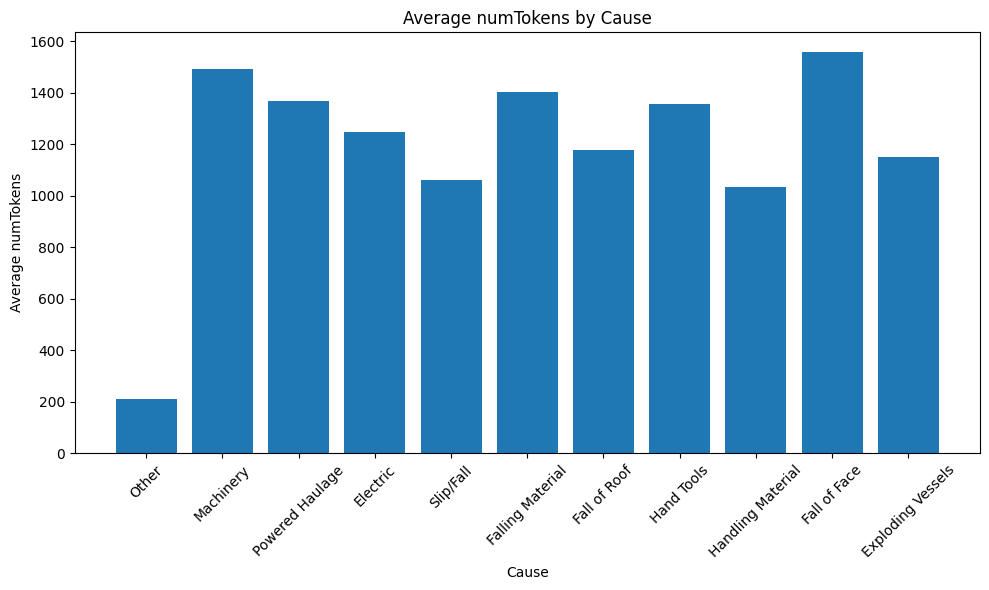

In [51]:
avg_num_tokens = []

for cause in causes:
    avg_num_tokens.append(data[data['cause'] == cause]['numTokens'].mean())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(causes, avg_num_tokens)
plt.xlabel('Cause')
plt.ylabel('Average numTokens')
plt.title('Average numTokens by Cause')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

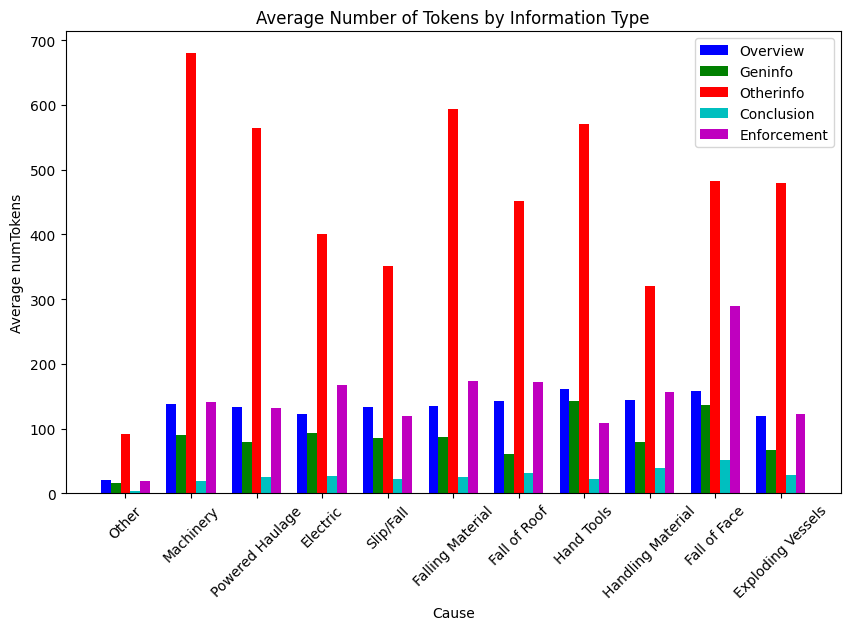

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique causes
causes = list(data['cause'].unique())

# Calculate the average token counts for each cause and token type
avg_num_tokens_overview = []
avg_num_tokens_geninfo = []
avg_num_tokens_otherinfo = []
avg_num_tokens_conclusion = []
avg_num_tokens_enforcement = []

for cause in causes:
    avg_num_tokens_overview.append(data[data['cause'] == cause]['numTokens_overview'].mean())
    avg_num_tokens_geninfo.append(data[data['cause'] == cause]['numTokens_geninfo'].mean())
    avg_num_tokens_otherinfo.append(data[data['cause'] == cause]['numTokens_otherinfo'].mean())
    avg_num_tokens_conclusion.append(data[data['cause'] == cause]['numTokens_conclusion'].mean())
    avg_num_tokens_enforcement.append(data[data['cause'] == cause]['numTokens_enforcement'].mean())

# Set the width of each bar
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(causes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(r1, avg_num_tokens_overview, color='b', width=bar_width, label='Overview')
plt.bar(r2, avg_num_tokens_geninfo, color='g', width=bar_width, label='Geninfo')
plt.bar(r3, avg_num_tokens_otherinfo, color='r', width=bar_width, label='Otherinfo')
plt.bar(r4, avg_num_tokens_conclusion, color='c', width=bar_width, label='Conclusion')
plt.bar(r5, avg_num_tokens_enforcement, color='m', width=bar_width, label='Enforcement')

plt.xlabel('Cause')
plt.ylabel('Average numTokens')
plt.title('Average Number of Tokens by Information Type')
plt.xticks([r + bar_width * 2 for r in range(len(causes))], causes, rotation=45)
plt.legend()

# Display the chart
plt.show()

Pull out the month from each and look at EDA for that 

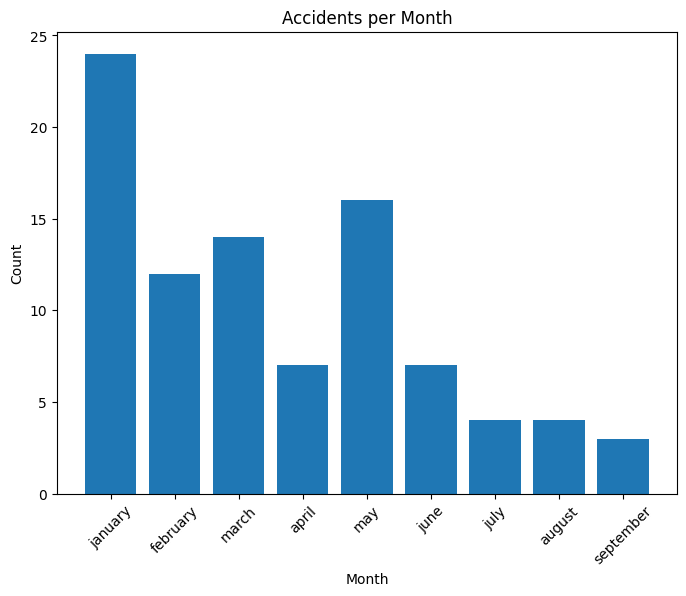

In [139]:
# Define the order of the months
month_order = ['january', 'february', 'march', 'april', 'may', 'june',
               'july', 'august', 'september', 'october', 'november', 'december']

month_counts = data['month'].value_counts()

# Sort the month counts based on the chronological order
sorted_counts = month_counts.reindex(month_order)

plt.figure(figsize=(8, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month')
plt.xticks(rotation=45)
plt.show()


# Modeling



## Naive Bayes
- Build a classification model and report the accuracy of your model against a hold-out test set


In [79]:
# Change the data into a list of tuples similar to how it was in the assignment

nb_data= [(row['cleantext'], row['cause']) for _, row in data.dropna()[['cause', 'cleantext']].iterrows()]

In [131]:
# Only using tokens that occur word_cutoff number of times - for feature reduction
word_cutoff = 5

tokens = [w for t, p in nb_data for w in t.split()]

word_dist = nltk.FreqDist(tokens)

feature_words = set()

for word, count in word_dist.items() :
    if count > word_cutoff :
        feature_words.add(word)
        
print(f"With a word cutoff of {word_cutoff}, we have {len(feature_words)} as features in the model.")


With a word cutoff of 5, we have 2721 as features in the model.


In [81]:
def data_features(text, fw):

    ret_dict = {}
    words = text.split()

    for word in words:
        if word in fw:
            ret_dict[word] = True

    return ret_dict

In [83]:
featuresets = [(data_features(text,feature_words), cause) for (text, cause) in nb_data]

In [87]:
# Set up for NaiveBayes Model
random.seed(509)
random.shuffle(featuresets)

# Using 20/80 test/train split 
test_size = int(len(nb_data) * 0.20)

# Fit and train NaiveBayes Model
test_set, train_set = featuresets[:test_size], featuresets[test_size:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

# Show most informative features
classifier.show_most_informative_features(25)

0.0
Most Informative Features
             pressurized = True           Hand T : Other  =     10.6 : 1.0
                february = True           Hand T : Powere =     10.0 : 1.0
                national = True           Hand T : Powere =     10.0 : 1.0
                  wooden = True           Hand T : Powere =     10.0 : 1.0
               energized = True           Electr : Other  =     10.0 : 1.0
                  affect = True           Fall o : Other  =      9.5 : 1.0
                     aid = True           Fall o : Other  =      9.5 : 1.0
                 alcohol = True           Fall o : Other  =      9.5 : 1.0
                   angel = True           Explod : Other  =      9.5 : 1.0
                applying = True           Explod : Other  =      9.5 : 1.0
                  arthur = True           Fall o : Other  =      9.5 : 1.0
                assisted = True           Fall o : Other  =      9.5 : 1.0
                   begin = True           Fall o : Other  =      9.5 :

#### Classification

In [147]:
# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()

# Extract the tweet texts and parties from tweet_data_sample
texts = [text for text, _ in nb_data]
causes = [cause for _, cause in nb_data]

# Convert the tweet texts into numerical features
X = vectorizer.fit_transform(texts )

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X, causes)

# Predict the party for each tweet and print the results
for text, cause in nb_data:
    texts_text = text
    # Convert the tweet text into numerical features
    X_tweet = vectorizer.transform([texts_text])
    # Predict the party using the trained classifier
    predicted_cause= classifier.predict(X_tweet)[0]
    
    print(f"Here's our (cleaned) text: {texts_text}")
    print(f"Actual cause is {cause} and our classifier says {predicted_cause}.")
    print("")

Here's our (cleaned) text: msha metalnonmetal mine fatal accident investigation report fatality # december   falling rock alaska leadzinc ore teck cominco alaska inc red dog skip to content subscribe to email updates united states department of labor site map faqs msha forms contact us mine safety and health administration msha protecting miners safety and health since  pdf version contains all graphics jump to overview united states department of labor mine safety and health administration metal and nonmetal mine safety and health report of investigation surface metal mine  lead and zinc  fatal falling material accident december   teck cominco alaska inc red dog mine kotzebue northwest arctic county alaska mine id no  investigator james e dejarnatt mine safety and health inspector originating office mine safety and health administration western district  peabody road suite  vacaville ca  arthur l ellis district manager overview jeffrey huber geologist age  was fatally injured on decem

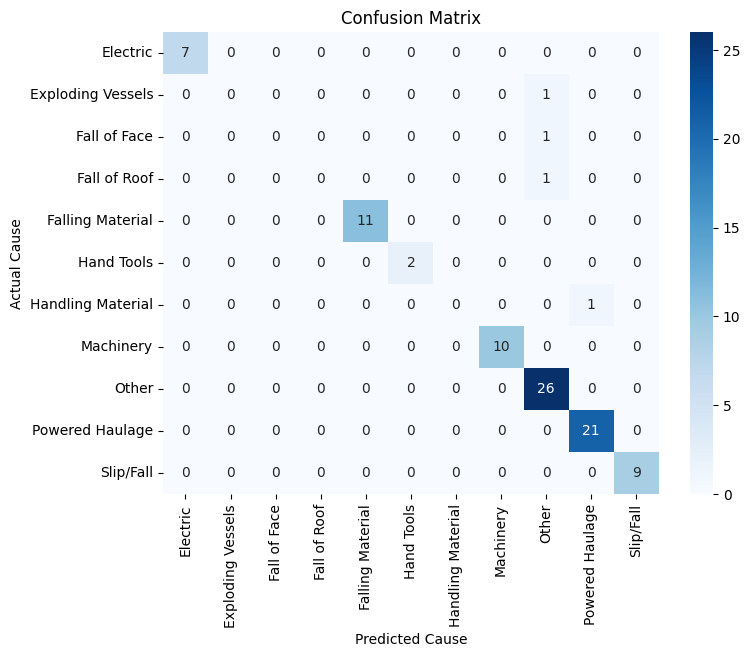

In [155]:
# Predict the cause for each tweet
predicted_causes = classifier.predict(X)

# Generate the confusion matrix
confusion_mat = confusion_matrix(causes, predicted_causes)

# Get the class labels from the classifier
class_labels = classifier.classes_

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cause")
plt.ylabel("Actual Cause")
plt.show()


## Topic Modeling
- Ignore the groups and build a topic model such as NMF, LSA, or LDA to put the data into groups. 
- Compare how well those topics agree with the a priori groups

In [96]:
tm_data = data.dropna()[['cause', 'cleantext']]

# Let's add some helpful columns on the df
tm_data['char_len'] = tm_data['cleantext'].apply(len)
tm_data['word_len'] = tm_data['cleantext'].apply(lambda x: len(x.split()))
tm_data

,cause,cleantext,char_len,word_len
9,Other,msha metalnonmetal mine fatal accident investi...,8315,1330
10,Other,msha metalnonmetal mine fatal accident investi...,14061,2336
12,Other,msha metalnonmetal mine fatal accident investi...,22566,3643
13,Machinery,msha metalnonmetal mine fatal accident investi...,15403,2486
14,Powered Haulage,msha metalnonmetal mine fatal accident investi...,19717,3197
...,...,...,...,...
218,Other,msha metalnonmetal mine fatal accident investi...,10836,1801
234,Falling Material,msha metalnonmetal mine fatal accident investi...,14686,2365
236,Other,msha metalnonmetal mine fatal accident investi...,15856,2652
237,Falling Material,msha metalnonmetal mine fatal accident investi...,11791,1948


<Axes: xlabel='cause'>

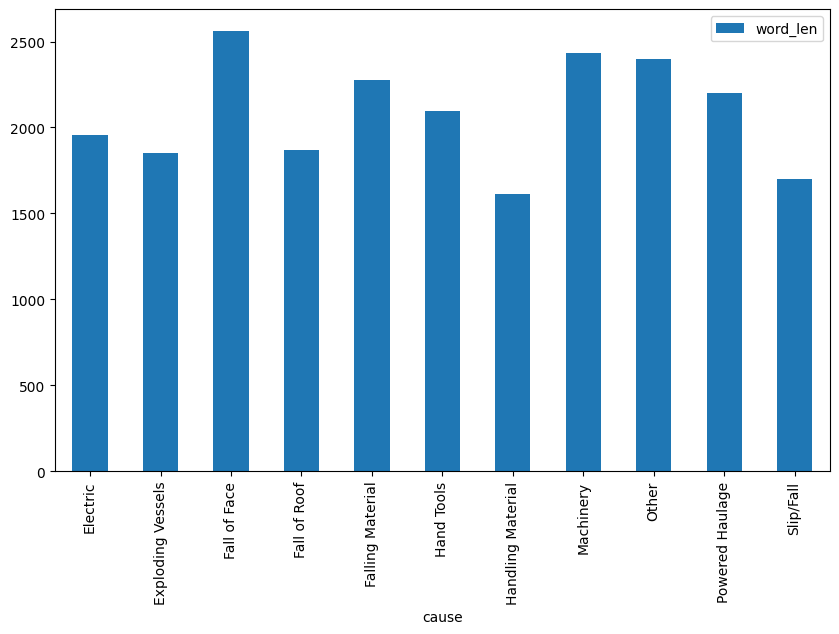

In [97]:
tm_data.groupby('cause').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))

TF-IDF and Count Vectorizations 

In [103]:
count_text_vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(tm_data["cleantext"])
print("count_text_vectors", count_text_vectors.shape)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(tm_data['cleantext'])
print("tfidf_text_vectors", tfidf_text_vectors.shape)

count_text_vectors (90, 1653)
tfidf_text_vectors (90, 1653)


Function for displaying topics from topic models

In [110]:
def display_topics_lda(lda_model, feature_names, num_terms=10):
    for topic_idx, topic in enumerate(lda_model.get_topics()):
        print(f"Topic {topic_idx + 1}:")
        topic_terms = [feature_names[i] for i in topic.argsort()[:-num_terms - 1:-1]]
        print(", ".join(topic_terms))
        print()

In [111]:
def display_topics_nmf(nmf_model, feature_names, num_terms=10):
    for topic_idx, topic in enumerate(nmf_model.components_):
        print(f"Topic {topic_idx + 1}:")
        topic_terms = [feature_names[i] for i in topic.argsort()[:-num_terms - 1:-1]]
        print(", ".join(topic_terms))
        print()


In [124]:
def display_topics_lsa(lsa_model, feature_names, num_terms=10):
    components = lsa_model.components_
    for topic_idx, topic in enumerate(components):
        print(f"Topic {topic_idx + 1}:")
        topic_terms = [feature_names[i] for i in topic.argsort()[:-num_terms - 1:-1]]
        print(", ".join(topic_terms))
        print()

### Non_Negative Matrix Factorization Model 

In [113]:
nmf_text_model = NMF(n_components=len(causes), random_state=509)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

display_topics_nmf(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())

Topic 1:
truck, haul, driver, dump, brakes, seat, axle, berm, trucks, water

Topic 2:
conveyor, belt, pulley, tail, return, roller, crusher, gravel, sand, entangled

Topic 3:
dredge, water, sand, pond, cable, pump, pumps, gravel, anchor, deck

Topic 4:
electrical, circuit, power, motor, transformer, breaker, energized, electrician, ball, building

Topic 5:
roof, drift, support, fault, fall, bolts, wire, ore, cover, rib

Topic 6:
loader, bucket, frontend, stone, tire, steer, skid, raised, hydraulic, seat

Topic 7:
dozer, highwall, bench, ramp, edge, water, bank, overburden, pit, seat

Topic 8:
crane, boom, motor, load, crusher, assembly, lift, lifting, anchor, outriggers

Topic 9:
floor, opening, mill, platform, level, deck, rail, larry, fall, fifth

Topic 10:
brake, air, service, steering, brakes, system, pressure, valve, engine, psi

Topic 11:
pipe, face, shaft, wall, valve, inch, line, steel, lime, hole



Compare the NMF factorization to the original categories from our data

In [114]:
def tally_categories(nmf_model, categories):
    topic_category_counts = []
    for topic in nmf_model.components_:
        category_count = defaultdict(int)
        for i, category in enumerate(categories):
            if topic[i] > 0:  # Considering topics where the weight is non-zero
                category_count[category] += 1
        topic_category_counts.append(category_count)
    return topic_category_counts

In [116]:
topic_category_counts = tally_categories(nmf_text_model, tm_data['cause'].unique())

for topic, category_count in enumerate(topic_category_counts):
    print(f"Topic {topic + 1}:")
    for category, count in category_count.items():
        print(f"{category}: {count}")
    print()

Topic 1:
Other: 1
Powered Haulage: 1
Slip/Fall: 1
Falling Material: 1
Hand Tools: 1
Handling Material: 1
Fall of Face: 1

Topic 2:
Powered Haulage: 1
Electric: 1
Falling Material: 1
Fall of Roof: 1
Hand Tools: 1
Handling Material: 1

Topic 3:
Other: 1
Machinery: 1
Powered Haulage: 1
Electric: 1
Slip/Fall: 1
Fall of Roof: 1
Handling Material: 1
Fall of Face: 1

Topic 4:
Other: 1
Powered Haulage: 1
Falling Material: 1
Hand Tools: 1
Exploding Vessels: 1

Topic 5:
Machinery: 1
Powered Haulage: 1
Electric: 1
Slip/Fall: 1
Fall of Roof: 1
Hand Tools: 1

Topic 6:
Machinery: 1
Powered Haulage: 1
Electric: 1
Falling Material: 1
Hand Tools: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 7:
Powered Haulage: 1
Electric: 1
Fall of Roof: 1
Hand Tools: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 8:
Machinery: 1
Powered Haulage: 1
Falling Material: 1
Hand Tools: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 9:
Powered Haulage: 1
Electric: 1
Slip/Fall: 1
Fall of Roof: 1
Fall of Face: 1
Exploding Vessel

Explain how the topic model compares to the original categories

### LSA Model 

In [122]:
lsa_model = make_pipeline(TruncatedSVD(n_components=len(causes), random_state=509), Normalizer(copy=False))
lsa_text_matrix = lsa_model.fit_transform(tfidf_text_vectors)

# Define function to tally categories for each topic
def tally_categories_lsa(lsa_model, categories):
    topic_category_counts = []
    for topic in lsa_model.components_:
        category_count = defaultdict(int)
        for i, category in enumerate(categories):
            if topic[i] > 0:  # Considering topics where the weight is non-zero
                category_count[category] += 1
        topic_category_counts.append(category_count)
    return topic_category_counts

lsa_topic_category_counts = tally_categories_lsa(lsa_model.named_steps['truncatedsvd'], tm_data['cause'].unique())
# Print topic and category tallies
for topic, category_count in enumerate(lsa_topic_category_counts):
    print(f"Topic {topic + 1}:")
    for category, count in category_count.items():
        print(f"{category}: {count}")
    print()

Topic 1:
Other: 1
Machinery: 1
Powered Haulage: 1
Electric: 1
Slip/Fall: 1
Falling Material: 1
Fall of Roof: 1
Hand Tools: 1
Handling Material: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 2:
Powered Haulage: 1
Electric: 1
Falling Material: 1
Fall of Roof: 1
Hand Tools: 1

Topic 3:
Other: 1
Powered Haulage: 1
Handling Material: 1
Fall of Face: 1

Topic 4:
Hand Tools: 1
Exploding Vessels: 1

Topic 5:
Powered Haulage: 1
Electric: 1
Slip/Fall: 1
Fall of Roof: 1
Hand Tools: 1

Topic 6:
Machinery: 1
Falling Material: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 7:
Electric: 1
Falling Material: 1
Hand Tools: 1
Exploding Vessels: 1

Topic 8:
Other: 1
Powered Haulage: 1
Fall of Roof: 1
Hand Tools: 1

Topic 9:
Powered Haulage: 1
Electric: 1
Slip/Fall: 1
Handling Material: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 10:
Machinery: 1
Electric: 1
Slip/Fall: 1
Falling Material: 1
Fall of Roof: 1
Hand Tools: 1
Handling Material: 1
Fall of Face: 1
Exploding Vessels: 1

Topic 11:
Other: 1
Machiner

In [125]:
display_topics_lsa(lsa_model.named_steps['truncatedsvd'], tfidf_text_vectorizer.get_feature_names_out())

Topic 1:
truck, brake, conveyor, loader, air, service, belt, haul, water, steering

Topic 2:
conveyor, belt, pulley, roller, dredge, tail, return, sand, crusher, crane

Topic 3:
conveyor, belt, brake, pulley, truck, tail, return, roller, brakes, haul

Topic 4:
electrical, circuit, power, motor, transformer, breaker, energized, electrician, ball, deenergized

Topic 5:
roof, drift, support, fall, dozer, bolts, opening, ore, fault, face

Topic 6:
crane, loader, boom, bucket, assembly, lift, lifting, frontend, load, jacks

Topic 7:
dozer, highwall, bench, ramp, loader, edge, seat, bank, overburden, quarry

Topic 8:
crane, truck, dozer, boom, crusher, motor, haul, load, outriggers, ramp

Topic 9:
pipe, air, floor, valve, mill, walkway, brake, compressor, line, cement

Topic 10:
brake, roof, crane, dozer, air, service, conveyor, pressure, system, anchor

Topic 11:
pipe, shaft, drill, jacks, jack, ton, hydraulic, crusher, pulley, steel



### LDA Model

In [126]:
# Convert count vectors to Gensim corpus
corpus = gensim.matutils.Sparse2Corpus(count_text_vectors.T)

# Create Gensim dictionary
id2word = dict((v, k) for k, v in count_text_vectorizer.vocabulary_.items())
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, id2word=id2word)

# Fit LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=314)

# Visualize LDA results
pyLDAvis.display(gensimvis.prepare(lda_model, corpus, dictionary=dictionary))

In [128]:
display_topics_lda(lda_model, count_text_vectorizer.get_feature_names_out())

Topic 1:
brake, loader, truck, air, service, control, system, inc, frontend, sand

Topic 2:
truck, conveyor, loader, brake, water, hydraulic, inc, dozer, haul, control

Topic 3:
truck, water, brake, dredge, loader, inches, inch, end, air, sand

Topic 4:
truck, crane, control, power, crusher, electrical, brake, inc, loader, system

Topic 5:
control, conveyor, system, truck, belt, task, electrical, crusher, level, loader

